## Setup, get data, plan work

### Setup

In [73]:
#import libs and load data
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

print("setup finished")

setup finished


### Get data

In [132]:
#Load dataset from folder
train_data = pd.read_csv("../titanic/titanic_data/train.csv")
test_data = pd.read_csv("../titanic/titanic_data/test.csv")

#Check shape of the data
print('Train data shape {}'.format(train_data.shape))
print('Test data shape {}'.format(test_data.shape))

Train data shape (891, 12)
Test data shape (418, 11)


In [133]:
#Concat data to get one full dataset 
train_data['train_test'] = 1
test_data['train_test'] = 0
test_data['Survived'] = np.NaN
all_data = pd.concat([train_data,test_data])
print('Shape', all_data.shape)
print('----------------------')
print(all_data.columns)

Shape (1309, 13)
----------------------
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')


### Plan work

Plan of the work
1. Setup and Load

2. Explore data: 
 2.1. General
 2.2. Hist, boxplots of num and cat data, look at the correlation
 2.3. Explore the title in the name column
 2.4. Explore ticket and cabin
 2.5. Explore survival rate among features with nan values

3. Data Preprocessing and feature generation

 3.1. Add features to full data set
 3.2. Fill missing data
 
 ...
 3.x. Drop, Encode and Normalize
 3.7. 
 
4. Model Building
 4.1. Basic Model Validation
 4.2. Model tuning

## Data exploring

### General data exploring

In [4]:
'''
SibSp - siblings and spouse
Parch - parents and children
'''
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [5]:
# data columns
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

In [6]:
all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [10]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  train_test   1309 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 143.2+ KB


In [7]:
#how many unique Cabins are
len(train_data.Cabin.unique())

148

In [9]:
#null values in the train dataset
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
train_test       0
dtype: int64

In [9]:
#null values in the test dataset
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
# percentage of missing data
train_data.isnull().sum() / train_data.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

### Separate numerical and categorical data exploring

In [11]:
#Find num data
train_data.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'train_test'],
      dtype='object')

In [12]:
# look at numeric and categorical values separately 
df_num = train_data[['Age','SibSp','Parch','Fare']]
df_cat = train_data[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

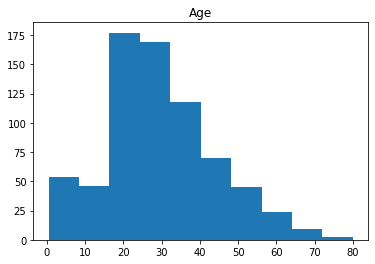

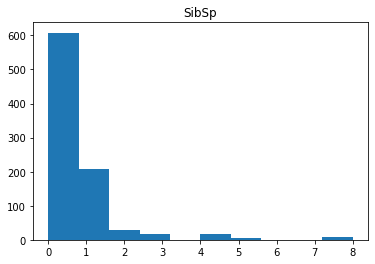

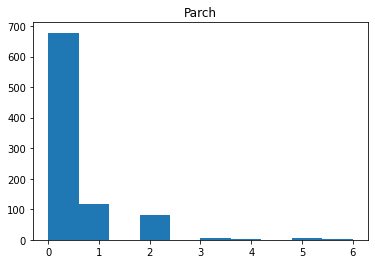

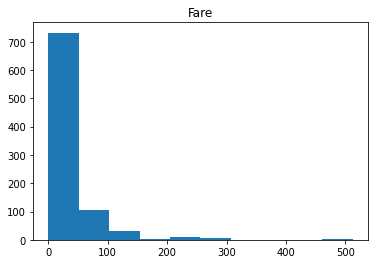

In [13]:
#distributions for all numeric variables 
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

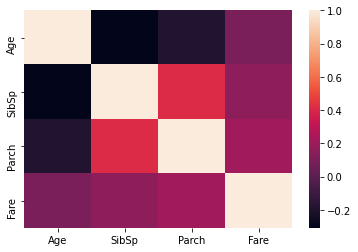

In [14]:
# Explore correlation
print(df_num.corr())
sns.heatmap(df_num.corr())

In [15]:
# compare survival rate across Age, SibSp, Parch, and Fare 
pd.pivot_table(train_data, index='Survived', values=['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


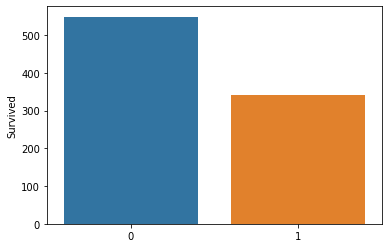

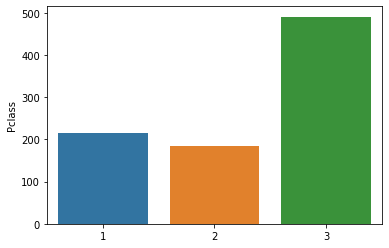

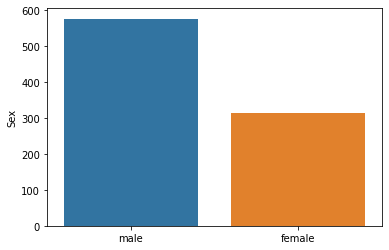

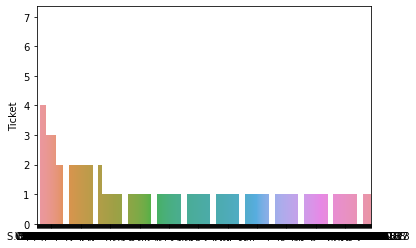

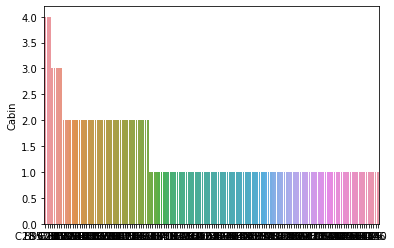

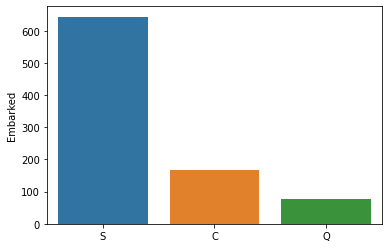

In [33]:
#cat variables
for i in df_cat.columns:
    sns.barplot(x=df_cat[i].value_counts().index,y=df_cat[i].value_counts())
    plt.show()

In [34]:
# Comparing survival and each of these categorical variables 
print(pd.pivot_table(train_data, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(train_data, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(train_data, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


### Explore name column and title 

In [82]:
train_data.Name.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [84]:
#Study person's title
#feature engineering on person's title 
train_data['name_title_all'] = train_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
#mr., ms., master. etc

In [86]:
train_data['name_title_all'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
Lady              1
Ms                1
Don               1
Sir               1
Jonkheer          1
the Countess      1
Capt              1
Mme               1
Name: name_title_all, dtype: int64

In [87]:
# Comparing survival and each of these title
print(pd.pivot_table(train_data, index = 'Survived', columns = 'name_title_all', values = 'Name' ,aggfunc ='count'))

name_title_all  Capt  Col  Don   Dr  Jonkheer  Lady  Major  Master   Miss  \
Survived                                                                    
0                1.0  1.0  1.0  4.0       1.0   NaN    1.0    17.0   55.0   
1                NaN  1.0  NaN  3.0       NaN   1.0    1.0    23.0  127.0   

name_title_all  Mlle  Mme     Mr   Mrs   Ms  Rev  Sir  the Countess  
Survived                                                             
0                NaN  NaN  436.0  26.0  NaN  6.0  NaN           NaN  
1                2.0  1.0   81.0  99.0  1.0  NaN  1.0           1.0  


### Explore ticket and cabin

In [108]:
#train_data.Ticket.unique()

In [109]:
#train_data.Cabin.unique()

#### Cabin studying

In [57]:
# Split cabin to a letter and number
df_cat.Cabin
train_data['cabin_multiple'] = train_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))

In [58]:
# after looking at this, we may want to look at cabin by letter or by number. Let's create some categories for this 
# letters 
# multiple letters 
train_data['cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [59]:
pd.pivot_table(train_data, index = 'Survived', columns = 'cabin_multiple', values = 'Ticket' , aggfunc ='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [61]:
#creates categories based on the cabin letter (n stands for null)
#in this case we will treat null values like it's own category

train_data['cabin_adv'] = train_data.Cabin.apply(lambda x: str(x)[0])

In [64]:
#comparing surivial rate by cabin
print(train_data.cabin_adv.value_counts())
pd.pivot_table(train_data,index='Survived',columns='cabin_adv', values = 'Name', aggfunc='count')

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64


cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


#### Ticket studying

In [65]:
#understand ticket values better 
#numeric vs non numeric 
train_data['numeric_ticket'] = train_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
train_data['ticket_letters'] = train_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)

In [67]:
train_data['numeric_ticket'].value_counts()

1    661
0    230
Name: numeric_ticket, dtype: int64

In [70]:
pd.set_option("max_rows", None)
train_data['ticket_letters'].value_counts()

0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
c              5
fcc            5
sopp           3
wep            3
pp             3
ppp            2
swpp           2
scah           2
sotono2        2
fa             1
as             1
scahbasle      1
sca4           1
casoton        1
sc             1
scow           1
sop            1
fc             1
sp             1
Name: ticket_letters, dtype: int64

In [77]:
#difference in numeric vs non-numeric tickets in survival rate 
pd.pivot_table(train_data, columns='numeric_ticket', index='Survived', values='Name', aggfunc='count')

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


In [129]:
print('Share of not survived numeric: {:.1%} vs. not_numeric: {:.1%}'.format(407 / (407 + 254), 142 / (142 + 88) ))

Share of not survived numeric: 61.6% vs. not_numeric: 61.7%


In [79]:
#difference between letters of the tickets in survival rate 
pd.pivot_table(train_data, columns='ticket_letters', index='Survived', values='Ticket', aggfunc='count')

ticket_letters,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


### Explore survival rate among features with nan values

#### nan cabin

In [106]:
train_data['nan_cabin'] = train_data.Cabin.apply(lambda x: 1 if pd.isna(x) else 0)

In [110]:
pd.pivot_table(train_data, index='Survived', columns='nan_cabin', values='Ticket', aggfunc='count')

nan_cabin,0,1
Survived,,
0,68,481
1,136,206


In [113]:
print('Share of not survived nan cabin: {:.2%}'.format(481 / (481 + 206)))

Share of not survived nan cabin: 70.01%


aha. we can see that around 70% of nan cabin passengers had not survived. could be additional criteria.  We will create a binary feature "nan_cabin" which tells the model about that fact

In [10]:
# Just want to check in nan cabin passengers had specific tickets
ticket_nancabin = nancabin_passengers.Ticket

In [11]:
print(ticket_nancabin)

0             A/5 21171
2      STON/O2. 3101282
4                373450
5                330877
7                349909
             ...       
884     SOTON/OQ 392076
885              382652
886              211536
888          W./C. 6607
890              370376
Name: Ticket, Length: 687, dtype: object


no specific tickets for that group

#### nan Age

In [115]:
train_data['Nan_Age'] = train_data.Age.apply(lambda x: 1 if pd.isna(x) else 0)

In [117]:
pd.pivot_table(train_data, index='Survived', columns='Nan_Age', values='Ticket', aggfunc='count')

Nan_Age,0,1
Survived,,
0,424,125
1,290,52


In [118]:
print('Share of not survived w/ nan_age: {:.2%}, and w/ known age: {:.2%} '.format(125 / (125 + 52), 424 / (424 + 290)))

Share of not survived w/ nan_age: 70.62%, and w/ known age: 59.38% 


we can see that nan Age passengers have only 10% higher "not survival" rate

In [119]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test,cabin_multiple,cabin_adv,numeric_ticket,ticket_letters,name_title_all,Nan_Age,nan_cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,n,0,a5,Mr,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,C,0,pc,Mrs,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,n,0,stono2,Miss,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1,C,1,0,Mrs,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,n,1,0,Mr,0,1


## Data Preprocessing and feature generation

In [101]:
#All data head
print(all_data.shape)
all_data.head()

(1309, 13)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [197]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 417
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     1306 non-null   int64  
 1   Survived        889 non-null    float64
 2   Pclass          1306 non-null   int64  
 3   Name            1306 non-null   object 
 4   Sex             1306 non-null   object 
 5   Age             1306 non-null   float64
 6   SibSp           1306 non-null   int64  
 7   Parch           1306 non-null   int64  
 8   Ticket          1306 non-null   object 
 9   Fare            1305 non-null   float64
 10  Cabin           293 non-null    object 
 11  Embarked        1306 non-null   object 
 12  train_test      1306 non-null   int64  
 13  nan_cabin       1306 non-null   int64  
 14  ticket_letters  1306 non-null   object 
 15  name_title_all  1306 non-null   object 
dtypes: float64(3), int64(6), object(7)
memory usage: 173.5+ KB


### Add features explored and generated previously on train_data

In [134]:
#create all categorical variables that we did above for both training and test sets 
#cabin
#all_data['cabin_multiple'] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
#all_data['cabin_adv'] = all_data.Cabin.apply(lambda x: str(x)[0])
all_data['nan_cabin'] = all_data.Cabin.apply(lambda x: 1 if pd.isna(x) else 0)

#ticket
#all_data['numeric_ticket'] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data['ticket_letters'] = all_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)

#title_all
all_data['name_title_all'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

### Group titles

In [15]:
all_data['name_title_all'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Dona              1
Don               1
Mme               1
the Countess      1
Sir               1
Jonkheer          1
Capt              1
Name: name_title_all, dtype: int64

In [135]:
test_data['name_title_all'] = test_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
test_data['name_title_all'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dr          1
Dona        1
Name: name_title_all, dtype: int64

In [ ]:
For prediction we need to keep Col, Rev, Dr, Ms,  group Dona 
Kill Captain line.

In [132]:
#Function is used to group title categories to simplify the model
#lamda function below used instead

def group_title(title_ser):
    
    title_gr = title_ser.copy()
    
    for ind,t  in title_ser.items():
        if t in ['Dona', 'Mme', 'Lady', 'the Countess']:
            title_gr[ind] = 'Mrs'
        if sub_name in ['Sir', 'Don', 'Jonkheer']:
            title_gr[ind] = 'Mr'
        if sub_name in ['Mlle']:
            title_gr[ind] = 'Miss'
    
    
    return title_gr



In [136]:
#title_all
all_data['Title'] = all_data.name_title_all.apply(lambda x: 'Mrs' if x in ['Dona', 'Mme', 'Lady', 'the Countess'] 
                                                  else 'Mr' if x in ['Sir', 'Don', 'Jonkheer']
                                                  else 'Miss' if x in ['Mlle']
                                                  else x)

### Fill missing Age values based on title

In [137]:
# a function to replace Nan Age values with mean from pre-calculated table
def fill_age (df, mean_table):
    
    df['Age'] = df.apply(
    lambda row: mean_table[row['name_title_all']] if np.isnan(row['Age']) else row['Age'],
    axis=1
    )    
    return df


In [138]:
#create separated title column and loc columns for Age calc
#all_data_title_column = fill_title(all_data)
all_data_title_age = all_data.loc[:,['name_title_all', 'Age']]
all_data_title_age.head()

,name_title_all,Age
0,Mr,22.0
1,Mrs,38.0
2,Miss,26.0
3,Mrs,35.0
4,Mr,35.0


In [139]:
mean_age_by_title = all_data_title_age.groupby(['name_title_all']).mean().loc[:,'Age']
print(mean_age_by_title)

name_title_all
Capt            70.000000
Col             54.000000
Don             40.000000
Dona            39.000000
Dr              43.571429
Jonkheer        38.000000
Lady            48.000000
Major           48.500000
Master           5.482642
Miss            21.774238
Mlle            24.000000
Mme             24.000000
Mr              32.252151
Mrs             36.994118
Ms              28.000000
Rev             41.250000
Sir             49.000000
the Countess    33.000000
Name: Age, dtype: float64


In [140]:
#Also usefull to evaluate the variance of the age estimate
var_age_by_title = all_data_title_age.groupby(['name_title_all']).std()
print(var_age_by_title)

                      Age
name_title_all           
Capt                  NaN
Col              5.477226
Don                   NaN
Dona                  NaN
Dr              11.731115
Jonkheer              NaN
Lady                  NaN
Major            4.949747
Master           4.161554
Miss            12.249077
Mlle             0.000000
Mme                   NaN
Mr              12.422089
Mrs             12.901767
Ms                    NaN
Rev             12.020815
Sir                   NaN
the Countess          NaN


In [141]:
#Estimate mean age for missing data.
all_data = fill_age(all_data, mean_age_by_title)

In [142]:
all_data.shape

(1309, 17)

### Define average Fare based on Pclass

#### Define the Fare dict

In [143]:
#Calculate average and std of the Fare depending on Pclass
all_class_fare = all_data.loc[:,['Pclass','Fare','Embarked']]
all_average_fare = all_class_fare.groupby(['Pclass']).mean().loc[:,'Fare']
all_std_fare = all_class_fare.groupby(['Pclass']).std().loc[:,'Fare']
print(all_average_fare, all_std_fare)

Pclass
1    87.508992
2    21.179196
3    13.302889
Name: Fare, dtype: float64 Pclass
1    80.447178
2    13.607122
3    11.494358
Name: Fare, dtype: float64


<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

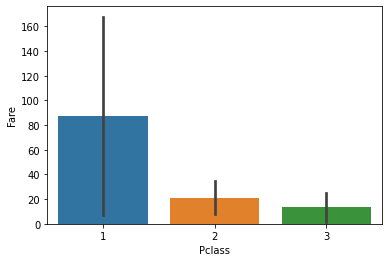

In [144]:
#plot the mean and std
sns.barplot(x=all_class_fare.Pclass, y=all_class_fare.Fare, data = all_class_fare, ci='sd')

In [145]:
#look at rhe median
all_median_fare = all_class_fare.groupby(['Pclass']).median().loc[:,'Fare']
print(all_median_fare)

Pclass
1    60.0000
2    15.0458
3     8.0500
Name: Fare, dtype: float64


In [146]:
#Make a dict to predict the fare
fare_dic = all_average_fare.to_dict()

In [90]:
#check the dict
fare_dic[2]

21.1791963898917

#### Find the fare

In [147]:
nofare_lines = all_data.loc[all_data.Fare.isna()]

In [148]:
missing_fare = fare_dic[nofare_lines.Pclass.item()]

In [149]:
ind = nofare_lines.index.item()
print('missing_fare: ' +  str(missing_fare) + '  index: ' + str(ind))

all_data.at[ind, 'Fare'] = missing_fare

missing_fare: 13.302888700564969  index: 152


In [150]:
all_data.shape

(1309, 17)

### Create parent attrubute feature

In [28]:
# not finished yet. Just Idea
# a function to create a Parent feature
def fill_parent (df):
    
##fill function 
    return pd.Series(par, index = ind, name = 'Parent')

###  Drop missing and exclusive rows, data encoding and normalization

#### Drop 'Embaked' missing rows in the train set

In [159]:
#drop some rows
#no column dropping

#drop 2 nan 'Embarked' rows
inds = all_data['Embarked'].isna()
rows_to_drop = inds.index[inds].tolist()
all_data.dropna(axis=0, subset=['Embarked'], inplace=True)
#train_data_clean = train_data_clean.drop(cols_to_drop, axis=1)

In [160]:
# Drop Captain row
ind_capt = all_data[all_data.Title == 'Capt'].index
print(ind_capt)
all_data = all_data.drop(axis=0, index = ind_capt)

Int64Index([745], dtype='int64')


In [162]:
all_data.shape

(1306, 17)

#### Normalization

<AxesSubplot:>

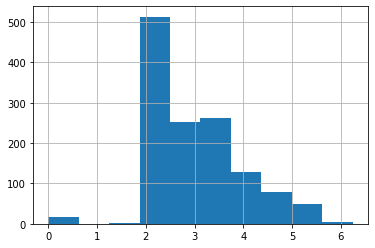

In [163]:
# log norm of fare (used)
all_data['norm_fare'] = np.log(all_data.Fare+1)
all_data['norm_fare'].hist()

#### Convert to cat variables 

In [164]:
# converted fare to category for pd.get_dummies()
all_data.Pclass = all_data.Pclass.astype(str)

In [165]:
# Get list of categorical variables
s = (all_data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:", object_cols )
#print(object_cols)

Categorical variables: ['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'ticket_letters', 'name_title_all', 'Title']


In [166]:
#Select cat variables to encode
cat_variables = ['Pclass', 'Sex', 'Age', 'SibSp',
                 'Parch', 'Embarked', 'Title', 'norm_fare', 'nan_cabin','train_test']

#### USE Get_dummies to Encode the cat vector

In [167]:
all_dummies = pd.get_dummies(all_data[cat_variables])

In [168]:
all_dummies.head()

,Age,SibSp,Parch,norm_fare,nan_cabin,train_test,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,Embarked_S,Title_Col,Title_Dr,Title_Major,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Ms,Title_Rev
0,22.0,1,0,2.110213,1,1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
1,38.0,1,0,4.280593,0,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,26.0,0,0,2.188856,1,1,0,0,1,1,...,1,0,0,0,0,1,0,0,0,0
3,35.0,1,0,3.990834,0,1,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,35.0,0,0,2.202765,1,1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0


In [34]:
#Emb = pd.get_dummies(train_data_clean.Embarked, prefix = 'Emb')

#### use OneHotEncoder

In [43]:
cat_variables = ['Pclass','Sex','Embarked','Title', ]
train_data_cat_vars = train_data_clean.loc[:,cat_variables]
#from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# labelencode the cat variables
#labelencoder_sex = LabelEncoder()
#labelencoder_emb = LabelEncoder()
#labelencoder_tit = LabelEncoder()
sex_cat = train_data_cat_vars.Sex.unique().tolist()
emb_cat = train_data_cat_vars.Embarked.unique().tolist()
tit_cat = train_data_cat_vars.Title.unique().tolist()

# creating instance of one-hot-encoder
enc = OneHotEncoder(categories = [sex_cat, emb_cat, tit_cat],drop = 'if_binary', handle_unknown='error')

In [46]:
enc.fit(train_data_cat_vars)

OneHotEncoder(categories=[['male', 'female'], ['S', 'C', 'Q'],
                          ['Mr', 'Mrs', 'Miss', 'Master', 'Rev', 'Dr', 'Ms',
                           'Major', 'Col']],
              drop='if_binary')

In [47]:
enc_names = enc.get_feature_names()

In [49]:
train_data_enc_1hot = enc.transform(train_data_cat_vars).toarray()

In [50]:
train_data_enc_1hot_df = pd.DataFrame(train_data_enc_1hot, columns = enc_names)

In [229]:
#train_data_enc_1hot_df.head()

In [52]:
#join data with main dataset
train_data_enc = train_data_clean.join(train_data_enc_1hot_df)

In [227]:
#train_data_enc.head()

In [228]:
#train_data_enc.columns

### Feature scaling (train data)

In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [58]:
scale_variables = ['Age','Fare']
train_data_scale_vars = train_data_clean.loc[:,scale_variables]

In [62]:
sc.fit(train_data_scale_vars) 

StandardScaler()

In [63]:
train_data_scaled_columns = sc.transform(train_data_scale_vars)

In [74]:
new_scale_variables = ['Age_sc', 'Fare_sc']
train_data_scaled_columns_df = pd.DataFrame(train_data_scaled_columns, columns = new_scale_variables)

In [76]:
train_data_enc_scaled = train_data_enc.join(train_data_scaled_columns_df)

In [258]:
#train_data_enc_scaled.head()

### Split Train Data

#### All data split after preprocessing

In [169]:
#Split to train test again
X_train = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis = 1)
X_test = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis = 1)


y_train = all_data[all_data.train_test==1].Survived
y_train.shape

(888,)

#### Train data split for validation

In [80]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, metrics


In [81]:
# Split train data for model validation
X = train_data_enc_scaled.drop(['Survived'], axis = 1)
y = train_data_enc_scaled['Survived']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Scale full data set

In [170]:
# Scale data 
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['Age','SibSp','Parch','norm_fare']]= scale.fit_transform(all_dummies_scaled[['Age','SibSp','Parch','norm_fare']])

X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1].drop(['train_test'], axis =1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 0].drop(['train_test'], axis =1)

y_train = all_data[all_data.train_test==1].Survived

In [171]:
all_dummies_scaled.head()

,Age,SibSp,Parch,norm_fare,nan_cabin,train_test,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,Embarked_S,Title_Col,Title_Dr,Title_Major,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Ms,Title_Rev
0,-0.596978,0.480498,-0.44478,-0.896048,1,1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
1,0.622060,0.480498,-0.44478,1.349266,0,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,-0.292219,-0.479029,-0.44478,-0.814689,1,1,0,0,1,1,...,1,0,0,0,0,1,0,0,0,0
3,0.393490,0.480498,-0.44478,1.049503,0,1,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0.393490,-0.479029,-0.44478,-0.800301,1,1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0


## Model building

### Validate performance of diff methods

In [172]:
#import models to perform cross-validation tests
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [225]:
#Function to fill cross_val_score for a set of estimators
def cross_val_vector(estim_vector, X, Xname, y):
    estim_name = []
    res_vector = []
    
    for estim in estim_vector:
        estim_name.append(str(estim))
        cv = cross_val_score(estim,X,y,cv=5)
        res_vector.append(cv.mean())
    
    #return pd.DataFrame(estim_name,res_vector)
    return pd.DataFrame(res_vector, index=estim_name , columns=Xname)

In [229]:
#Naive Bayes
gnb = GaussianNB()

# Logistic Regression
lr = LogisticRegression(max_iter = 2000)

#Decision Tree. X_train_scaled
dt = tree.DecisionTreeClassifier(random_state = 1)

#Random Forest. X_train_scaled
rf = RandomForestClassifier(random_state = 1)

#KNeightbors. X_train_scaled
knn = KNeighborsClassifier()

#Support Vector Classifier
svc = SVC(probability = True)

#XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)

#Voting classifier 
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc),('xgb',xgb)], 
                              voting = 'soft') 

In [232]:
#Buils estim vector
estimators = [gnb, lr, dt, rf, knn, svc, xgb, voting_clf]

#Caclulate score for the vector of estimators
cross_Xtrain = cross_val_vector(estimators, X_train, ['X_train'], y_train)

In [ ]:
cross_Xtrain_scaled = cross_val_vector(estimators, X_train_scaled, ['X_train_scaled'], y_train)

In [236]:
cross_df = pd.concat([cross_Xtrain, cross_Xtrain_scaled], axis=1)

In [237]:
cross_df

,X_train,X_train_scaled
GaussianNB(),0.797347,0.781616
LogisticRegression(max_iter=2000),0.832248,0.832248
DecisionTreeClassifier(random_state=1),0.793893,0.797264
RandomForestClassifier(random_state=1),0.810779,0.808525
KNeighborsClassifier(),0.811991,0.808589
SVC(probability=True),0.722992,0.828826
"XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,\n colsample_bynode=None, colsample_bytree=None, gamma=None,\n gpu_id=None, importance_type='gain', interaction_constraints=None,\n learning_rate=None, max_delta_step=None, max_depth=None,\n min_child_weight=None, missing=nan, monotone_constraints=None,\n n_estimators=100, n_jobs=None, num_parallel_tree=None,\n random_state=1, reg_alpha=None, reg_lambda=None,\n scale_pos_weight=None, subsample=None, tree_method=None,\n validate_parameters=None, verbosity=None)",0.823183,0.823183
"VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=2000)),\n ('knn', KNeighborsClassifier()),\n ('rf', RandomForestClassifier(random_state=1)),\n ('gnb', GaussianNB()),\n ('svc', SVC(probability=True)),\n ('xgb',\n XGBClassifier(base_score=None, booster=None,\n colsample_bylevel=None,\n colsample_bynode=None,\n colsample_bytree=None, gamma=None,\n gpu_id=None, importance_t...\n interaction_constraints=None,\n learning_rate=None,\n max_delta_step=None, max_depth=None,\n min_child_weight=None, missing=nan,\n monotone_constraints=None,\n n_estimators=100, n_jobs=None,\n num_parallel_tree=None,\n random_state=1, reg_alpha=None,\n reg_lambda=None,\n scale_pos_weight=None,\n subsample=None, tree_method=None,\n validate_parameters=None,\n verbosity=None))],\n voting='soft')",0.829963,0.833352


In [182]:
#Predict the result and prepare submission
voting_clf.fit(X_train_scaled,y_train)
y_hat_base_vc = voting_clf.predict(X_test_scaled).astype(int)

basic_submission = {'PassengerId': test_data.PassengerId, 'Survived': y_hat_base_vc}

base_submission = pd.DataFrame(data=basic_submission)
base_submission.to_csv('base_submission.csv', index=False)

### Model tuning

In [239]:
#Use gridSearch to fine tune the models
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV

In [240]:
#simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [241]:
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train_scaled,y_train)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.6s


Logistic Regression
Best Score: 0.8333714213165747
Best Parameters: {'C': 1.623776739188721, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   13.3s finished


### LightGBM model train

In [88]:
import lightgbm as lgb


dtrain = lgb.Dataset(X_train[feature_cols_1], label=y_train)
dvalid = lgb.Dataset(X_val[feature_cols_1], label=y_val)

param = {'num_leaves': 64, 'objective': 'binary'}
param['metric'] = 'auc'
num_round = 1000
bst = lgb.train(param, dtrain, num_round, valid_sets=[dvalid], early_stopping_rounds=10, verbose_eval=False)


[LightGBM] [Info] Number of positive: 267, number of negative: 444
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001981 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 231
[LightGBM] [Info] Number of data points in the train set: 711, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.375527 -> initscore=-0.508576
[LightGBM] [Info] Start training from score -0.508576
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

### XGBoost model

In [89]:
from xgboost import XGBClassifier

In [90]:
XGB_model = XGBClassifier()
XGB_model.fit(X_train[feature_cols_1], y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [92]:
y_pred = XGB_model.predict(X_val[feature_cols_1])

In [94]:
y_pred_ = XGB_model.predict_proba(X_val[feature_cols_1])
y_pred_

array([[9.05129373e-01, 9.48706120e-02],
       [9.15475845e-01, 8.45241696e-02],
       [2.92412519e-01, 7.07587481e-01],
       [8.81880522e-02, 9.11811948e-01],
       [7.65760124e-01, 2.34239876e-01],
       [2.22393870e-02, 9.77760613e-01],
       [9.27843630e-01, 7.21563473e-02],
       [8.16022873e-01, 1.83977127e-01],
       [9.34283078e-01, 6.57169074e-02],
       [2.05547214e-02, 9.79445279e-01],
       [8.33933115e-01, 1.66066885e-01],
       [8.36771727e-01, 1.63228288e-01],
       [1.08978748e-02, 9.89102125e-01],
       [1.88533068e-02, 9.81146693e-01],
       [9.76648211e-01, 2.33517960e-02],
       [8.64448249e-01, 1.35551736e-01],
       [2.96606004e-01, 7.03393996e-01],
       [5.76568961e-01, 4.23431009e-01],
       [9.75218713e-01, 2.47812830e-02],
       [6.42396212e-02, 9.35760379e-01],
       [2.82080770e-01, 7.17919230e-01],
       [2.98591256e-01, 7.01408744e-01],
       [8.40427637e-01, 1.59572348e-01],
       [3.40475917e-01, 6.59524083e-01],
       [1.224988

In [95]:
y_pred

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0], dtype=int64)

In [96]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix

confusion_matrix(y_val, y_pred)

array([[81, 24],
       [39, 34]], dtype=int64)

In [97]:
print("Mean Absolute Error: " + str(mean_absolute_error(y_pred, y_val)))

Mean Absolute Error: 0.3539325842696629


### Make predictions

In [ ]:
from sklearn import metrics
ypred = bst.predict(test[feature_cols])
score = metrics.roc_auc_score(test['outcome'], ypred)

## Get result on test dataset

Plan:
1. Overview and recap
2. Fill missing
3. Drop data and Encoding
4. Select feature vector and learn
5. Predict

### General overview of the test_data

In [32]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [34]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Fill missing test data

#### Fill age

In [28]:
#create separated title column
test_data_title_column = fill_title(test_data)

In [35]:
test_data_title_column.shape

(418,)

In [36]:
#join the title column and fill missing age lines
test_data = test_data.join(test_data_title_column)
test_data = fill_age(test_data, mean_age_by_title)

In [38]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Title        418 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 39.3+ KB


#### Fill Fare
We have 1 missing 'Fare' value  
!!! This code is temporary for unique case of 1 missing value

In [103]:
nofare_lines = test_data.loc[test_data.Fare.isna()]

In [104]:
#bad way to treat df
nofare_lines.Fare = fare_dic[fare_line.Pclass.item()]

C:\Users\mikhe\miniconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [102]:
missing_fare = fare_dic[fare_line.Pclass.item()]
ind = fare_line.index.item()
print('missing_fare: ' +  str(missing_fare) + '  index: ' + str(ind))

missing_fare: 13.675550101832997  index: 152


In [120]:
test_data.at[ind, 'Fare'] = missing_fare

### Drop not usable data and encode variables

#### Drop cols

In [123]:
#drop_not_usable_cols
cols_to_drop = ['Cabin','Name','Ticket','PassengerId']

test_data_clean = test_data.drop(cols_to_drop, axis=1)

In [124]:
test_data_clean.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,male,34.5,0,0,7.8292,Q,Mr
1,3,female,47.0,1,0,7.0000,S,Mrs
2,2,male,62.0,0,0,9.6875,Q,Mr
3,3,male,27.0,0,0,8.6625,S,Mr
4,3,female,22.0,1,1,12.2875,S,Mrs


#### Encode full train dataset and test data

In [125]:
print("Categorical variables:", object_cols )

Categorical variables: ['Sex', 'Embarked', 'Title']


In [128]:
#copy data to a new df to form data w encoded categorical variables
X_label = X.copy()
test_data_label = test_data_clean.copy()

#iterate through categorical variables
for feature in object_cols:
    label_encoder = preprocessing.LabelEncoder()
    label_encoder.fit(X[feature])
    labeled_fulltrain = label_encoder.transform(X[feature])  
    labeled_test = label_encoder.transform(test_data_clean[feature])
    X_label[feature + '_label'] = labeled_fulltrain 
    test_data_label[feature + '_label'] = labeled_test

In [131]:
X_label.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Sex_label,Embarked_label,Title_label
0,3,male,22.0,1,0,7.2500,S,Mr,1,2,5
1,1,female,38.0,1,0,71.2833,C,Mrs,0,0,6
2,3,female,26.0,0,0,7.9250,S,Miss,0,2,4
3,1,female,35.0,1,0,53.1000,S,Mrs,0,2,6
4,3,male,35.0,0,0,8.0500,S,Mr,1,2,5


In [132]:
print(X_label.shape, test_data_label.shape)

(889, 11) (418, 11)


### Learn the model on full train dataset

In [130]:
#select feature vector
feature_cols_v1 = ['Pclass','Sex_label','Embarked_label','Title_label','Age','Fare','SibSp','Parch']

#### XGBoost model

In [135]:
#from xgboost import XGBClassifier - already done
#train
XGB_model_full = XGBClassifier()
XGB_model_full.fit(X_label[feature_cols_v1], y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Prediction

In [139]:
#XGB prediction
y_test_pred = XGB_model_full.predict(test_data_label[feature_cols_v1])

In [141]:
type(y_test_pred)

numpy.ndarray

In [143]:
#save the submission
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': y_test_pred})
output.to_csv('../titanic/submissions/XGB_submission.csv', index=False)
print("Submission was successfully saved!")

Submission was successfully saved!
